# Pymaceuticals
* Trend 1
* Trend 2
* Trend 3

## Import dependencies and specify filepaths
* Files will be local to avoid needing to use relative filepaths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
clinicaldf = pd.read_csv('clinicaltrial_data.csv')
mousedf = pd.read_csv('mouse_drug_data.csv')

## Tumor Size Response to Drug Treatment

Text(0.5,1,'Tumor Size Response to Treatment')

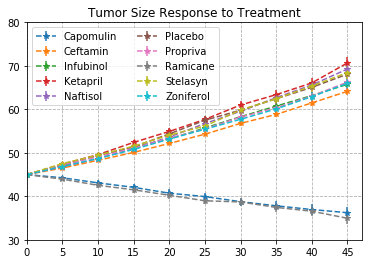

In [59]:
datadf = clinicaldf.merge(mousedf,on=['Mouse ID'],how='inner')
#Use groupby to groupby drug and timepoint
datadf_groupby = datadf.groupby(['Drug','Timepoint'])
#Use the mean method on the Drug/Timepoint groupby to average tumor size across all mice
groupby_meantumor = datadf_groupby['Tumor Volume (mm3)'].mean()
groupby_meantumor_sem = datadf_groupby['Tumor Volume (mm3)'].sem()
list_of_drugs = []
#Use the index.levels object to create a list of drug names
for i in groupby_meantumor.index.levels[0]:
    list_of_drugs.append(i)
#Create a new dataframe to incrementally add drug & tumor data to
meantumor = pd.DataFrame(data=groupby_meantumor.loc[list_of_drugs[0]],index=groupby_meantumor.index.levels[1])
#This is an ugly work-around to rename the column to the drug name
#NaN's result from attempting to use the column assignment in the DataFrame constructor
meantumor = meantumor.rename(columns={'Tumor Volume (mm3)':list_of_drugs[0]})
#Loop over the list of drugs to finish constructing the dataframe for plotting
for i in range(1,len(list_of_drugs)):
    meantumor = meantumor.join(groupby_meantumor[list_of_drugs[i]])
    meantumor = meantumor.rename(columns={'Tumor Volume (mm3)':list_of_drugs[i]})
#Use NumPy to extract index array values to a list for the plot's x axis
x_axis = meantumor.index.values.tolist()
#Loop over the list of drugs to add series to the errorbar plot
for i in list_of_drugs:
    plt.errorbar(x=x_axis,y=meantumor[i],yerr=groupby_meantumor_sem[i],fmt='--*')
#Format the plot for maximum readability, see comments for decision logic
#Due to number of drugs, force multiple columns but still allow pyplot to best fit
plt.legend(ncol=2)
#Set x axis limits dynamically based on time points using list indices
plt.xlim(x_axis[0],x_axis[-1]+2)
#This limit is hardcoded to save time, should be made dynamic if possible
plt.ylim(30,80)
#Enable gridlines for ease of value interpolation
plt.grid(linestyle='dashed')
#Force x ticks to be present at each member of the x_axis list
plt.xticks(x_axis)
#Set chart and axes titles
plt.title('Tumor Size Response to Treatment')
plt.xtitle